<a href="https://colab.research.google.com/github/YagyanshB/portfolio-projects/blob/main/violations_caught_by_police_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Violations Intercepted by Police Analysis:

# Importing Required Libraries:

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Uploading & Inspecting the Dataset:

In [81]:
df = pd.read_csv('police.csv')

In [82]:
# Inspecting the first two rows of the dataset

df.head(2)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [83]:
# Inspecting the number of rows and columns in the dataset

df.shape

print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 65535
Number of columns: 15


In [84]:
# Inspecting the variances within the dataset

df.describe()

,country_name,driver_age_raw,driver_age
count,0.0,61481.000000,61228.000000
mean,NaN,1967.791106,34.148984
std,NaN,121.050106,12.760710
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1978.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [85]:
# Inspecting the data types present within our dataset

df.dtypes

,0
stop_date,object
stop_time,object
country_name,float64
driver_gender,object
driver_age_raw,float64
driver_age,float64
driver_race,object
violation_raw,object
violation,object
search_conducted,bool


In [86]:
# Extracting information surrounding the dataset and the variables at hand

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [87]:
# Inspecting for null values present within the dataset

df.isnull().sum()

,0
stop_date,0
stop_time,0
country_name,65535
driver_gender,4061
driver_age_raw,4054
driver_age,4307
driver_race,4060
violation_raw,4060
violation,4060
search_conducted,0


In [88]:
# For reference purposes we are dropping all columns that have null values. In an
# ideal scenario we wouldn't be doing this

df.drop(['country_name', 'driver_race', 'driver_gender', 'driver_age', 'violation', 'search_type', 'stop_outcome', 'is_arrested',
         'stop_duration', 'driver_age_raw', 'violation_raw'], axis = 1, inplace=True)

In [89]:
# Inspecting again if the dataset has any null values

df.isnull().sum()

,0
stop_date,0
stop_time,0
search_conducted,0
drugs_related_stop,0


In [90]:
df.head()

,stop_date,stop_time,search_conducted,drugs_related_stop
0,1/2/2005,1:55,False,False
1,1/18/2005,8:15,False,False
2,1/23/2005,23:15,False,False
3,2/20/2005,17:15,False,False
4,3/14/2005,10:00,False,False


In [91]:
# Uploading the police dataset file into a new variable

df1 = pd.read_csv('police.csv')
df1.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Investigative Analysis of Police Dataset:

We would want to know the number of males and females present within our dataset.

In [70]:
df1['driver_gender'].value_counts()

,count
driver_gender,
M,45164
F,16310


We would want to know the gender count difference for violations particularly towards Speeding.



In [71]:
df1[df1['violation'] == 'Speeding']['driver_gender'].value_counts()

,count
driver_gender,
M,25517
F,11686


We would want to group genders that got searched more.

In [72]:
df1.groupby('driver_gender').search_conducted.sum()

,search_conducted
driver_gender,
F,366
M,2113


As the stop duration is in a range, we would be converting it into int through mapping in order to calculate the mean stop duration.

In [73]:
df1['stop_duration'].value_counts()

,count
stop_duration,
0-15 Min,47379
16-30 Min,11448
30+ Min,2647
2,1


In [74]:
df1['stop_duration'] = df1['stop_duration'].map({'0-15 Min': 7.5, '16-30 Min': 24, '30+ Min': 45})

In [75]:
df1['stop_duration'].value_counts()

,count
stop_duration,
7.5,47379
24.0,11448
45.0,2647


In [76]:
df1['stop_duration'].mean()

12.187420698181345

In [77]:
df1['driver_age'].value_counts()

,count
driver_age,
22.0,2912
21.0,2886
20.0,2783
23.0,2725
24.0,2583
...,...
15.0,5
84.0,3
88.0,2


We would want to compare the age distributions against every violation.

In [92]:
df1.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


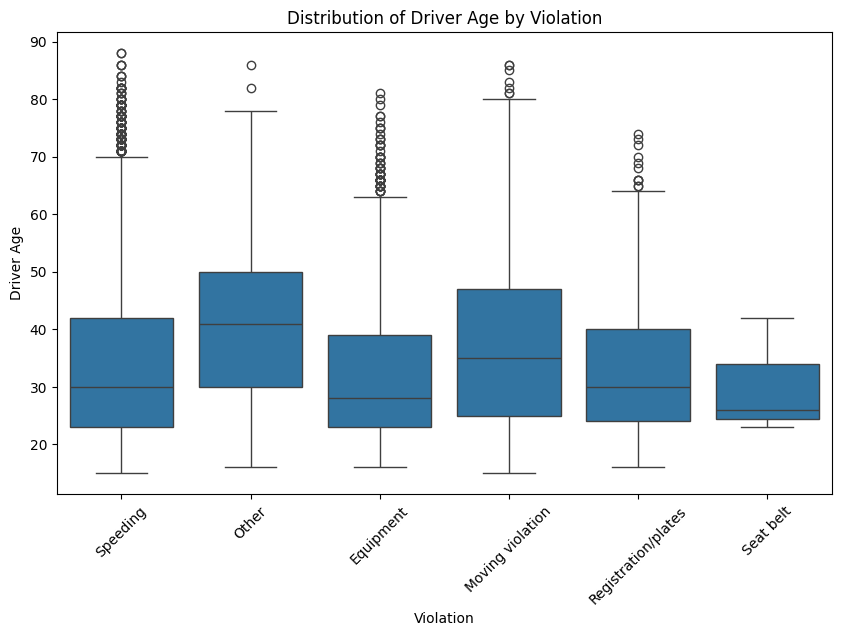

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='violation', y='driver_age', data=df1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of Driver Age by Violation')
plt.xlabel('Violation')
plt.ylabel('Driver Age')
plt.show()

In [94]:
df1.dtypes

,0
stop_date,object
stop_time,object
country_name,float64
driver_gender,object
driver_age_raw,float64
driver_age,float64
driver_race,object
violation_raw,object
violation,object
search_conducted,bool


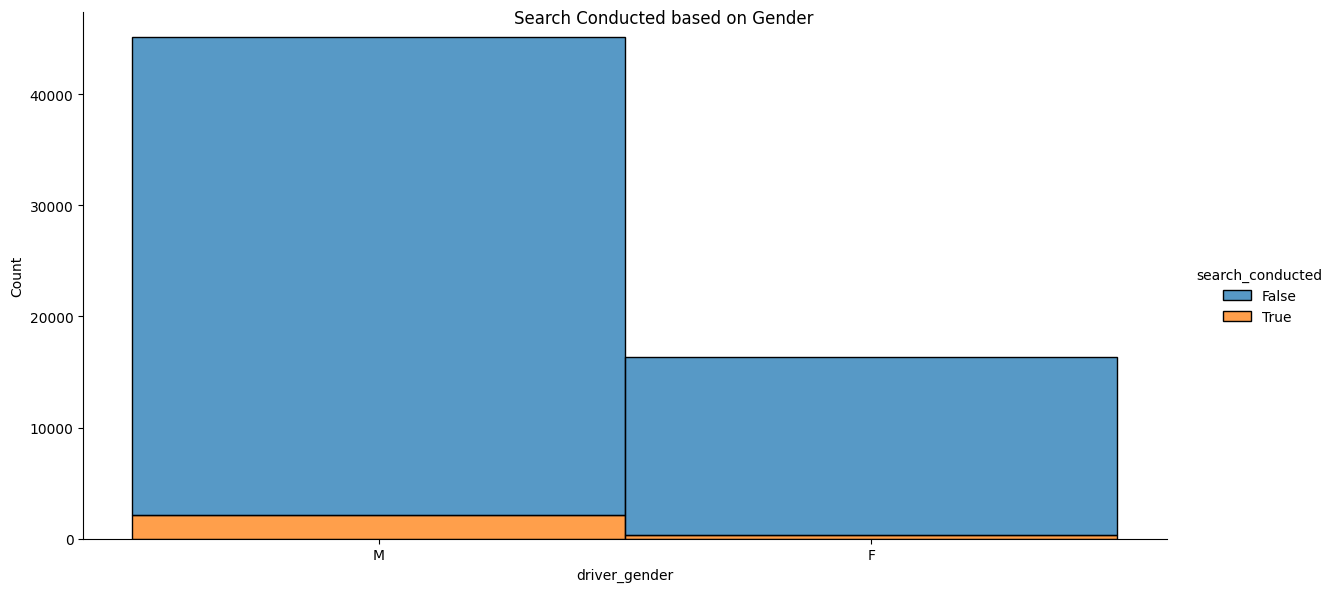

In [115]:
sns.displot(data=df1, x="driver_gender", hue="search_conducted", multiple="stack", height=6, aspect=2)
plt.suptitle('Search Conducted based on Gender') # Set title for the entire figure using plt.suptitle
plt.show()